In [92]:
# Data Visualization
import pandas as pd 
import numpy as np

# Visualization
import plotly.express as px
import squarify
import matplotlib.pyplot as plt

# Sklearn
from sklearn.manifold import LocallyLinearEmbedding as lle
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from minisom import MiniSom

from sklearn.preprocessing import StandardScaler


# Importacion de los datos

In [232]:
df = pd.read_excel("IMM_2020.xls")
df_ = df.drop([0, 1, 2, 3, 4], axis = 0)
columns = df.iloc[2]
df_.columns = columns
df_ = df_.dropna()

del_col = ['Clave de la entidad federativa', 'Nombre de la entidad', 'Clave del municipio', 'Nombre del municipio', 'Grado de marginación, 2020', "Índice de marginación, 2020"]
estados = ['México ', 'Guanajuato', 'Baja California', 'Veracruz de Ignacio de la Llave', 'Yucatán', 'Guerrero']
X = df_[df_['Nombre de la entidad'].isin(estados)]
y = X["Grado de marginación, 2020"]
y_estados = X["Nombre de la entidad"]
y_margin = X["Índice de marginación, 2020"] 
X = X.drop(del_col, axis = 1)

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X


18      58.082238
19      59.384989
20      58.390077
21      59.140287
22      58.291417
          ...    
2413    54.517075
2414    51.462046
2415    49.328247
2416    55.812858
2417    54.357343
Name: Índice de marginación, 2020, Length: 451, dtype: object


2,Población total,% Población de 15 años o más analfabeta,% Población de 15 años o más sin educación básica,% Ocupantes en viviendas particulares sin drenaje ni excusado,% Ocupantes en viviendas particulares sin energía eléctrica,% Ocupantes en viviendas particulares sin agua entubada,% Ocupantes en viviendas particulares con piso de tierra,% Viviendas particulares con hacinamiento,% Población en localidades con menos de 5 000 habitantes,% Población ocupada con ingresos menores a 2 salarios mínimos,"Índice de marginación normalizado, 2020",Lugar que ocupa en el contexto nacional
0,2.521545,-1.416879,-2.018821,-0.771068,-0.005367,-0.334197,-0.658599,-1.546782,-1.630432,-0.690744,1.399669,1.834234
1,6.430499,-1.510969,-2.352453,-0.795258,-0.688741,-0.691037,-0.712219,-1.660013,-1.695414,-1.819465,1.744514,2.124824
2,0.358233,-1.464334,-1.835843,-0.772279,-0.299407,-0.456834,-0.667603,-1.527660,-1.426284,-1.330741,1.481156,1.925338
3,12.060120,-1.531841,-2.077663,-0.795133,-0.831880,-0.646817,-0.611740,-1.438837,-1.984859,-1.263541,1.679740,2.093409
4,0.477247,-1.453241,-1.618265,-0.775252,-0.657142,-0.294310,-0.552888,-1.398298,-1.565160,-1.478845,1.455040,1.892352
...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.209999,-0.414384,-1.150257,0.574231,-0.147673,-0.652217,-0.491403,0.798929,-1.023367,-1.329489,0.455951,0.400135
447,-0.319006,-0.331098,0.039296,2.106993,-0.487145,-0.744987,-0.703700,0.897077,0.951158,-0.141753,-0.352732,-0.719813
448,-0.235800,0.452225,0.249218,1.428596,1.856043,-0.539789,-0.299593,1.566338,0.951158,0.737935,-0.917560,-1.161195
449,-0.320026,-1.192815,-1.752482,-0.192337,-0.564523,-0.660596,-0.819352,-0.557732,0.951158,-0.222163,0.798952,0.940475


# Codigo para las graficas

In [50]:
def Plot2D(X, y, plot_name):
    
    fig = px.scatter(None, x = X[:,0], y = X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    fig.update_layout(dict(plot_bgcolor = 'white'))

    fig.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey', 
                     zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', 
                     showline = True, linewidth = 1, linecolor = 'black')

    fig.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = 'lightgrey', 
                     zeroline = True, zerolinewidth = 1, zerolinecolor = 'lightgrey', 
                     showline = True, linewidth = 1, linecolor = 'black')

    fig.update_layout(title_text = plot_name)

    fig.update_traces(marker = dict(size = 5,
                        line = dict(color = 'black', width = 0.3)))
    
    return fig


def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )

    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
                                             
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig

# Aplicacion de los metodos a los datos

### 1. Locally Linear Embedding

In [83]:
def run_lle(X, n_comp, n_neighbors):
    embed_lle = lle(n_neighbors = n_neighbors,
                    n_components = n_comp,  
                    reg = 0.001, 
                    eigen_solver = 'auto',
                    method= 'standard', 
                    neighbors_algorithm ='auto', 
                    n_jobs = 4 
                   )

    result = embed_lle.fit_transform(X)

    return result

lle2comp = run_lle(X, 2, 30)
lle3comp = run_lle(X, 3, 30)


**Creamos un mapa 2D para observar los cluster de indigencia**

In [53]:
Plot2D(lle2comp, y, 'LLE de 2 dimensiones')

**Creamos un mapa 2D para observar los cluster de los estados**

In [54]:
Plot2D(lle2comp, y_estados, 'LLE de 2 dimensiones')

**Creamos un mapa 3D para observar los cluster del nivel de Indigencia**

In [55]:
Plot3D(lle3comp, y, 'LLE de 3 dimensiones')

**Creamos un mapa 3D para observar los cluster de los estados**

In [56]:
Plot3D(lle3comp, y_estados, 'LLE de 2 dimensiones')

### 2. Isomaps

In [57]:
def run_isomap(X, n_comp, num_neighbors):
    
    embed_isomap = Isomap(n_neighbors = num_neighbors, 
                          n_components = n_comp, 
                          n_jobs = 4)
    
    result = embed_isomap.fit_transform(X)
    
    return result

isomap2comp = run_isomap(X, 2, 30)
isomap3comp = run_isomap(X, 3, 30)

**Creamos un mapa 2D para observar los cluster del nivel de Indigencia**

In [58]:
Plot2D(isomap2comp, y, 'Isomap de 2 dimensiones')

**Creamos un mapa 2D para observar los cluster de los estados**

In [59]:
Plot2D(isomap2comp, y_estados, 'Isomap de 2 dimensiones')

**Creamos un mapa 3D para observar los cluster del nivel de Indigencia**

In [60]:
Plot3D(isomap3comp, y, 'Isomap de 3 dimensiones')

**Creamos un mapa 3D para observar los cluster de los estados**

In [61]:
Plot3D(isomap3comp, y_estados, 'Isomap de 3 dimensiones')

### 3. T-SNE

In [62]:
def run_tsne(X, n_comp):
    
    embed_tsne = TSNE(n_components = n_comp, 
                      n_jobs = 4, 
                      random_state = 0)
    
    result = embed_tsne.fit_transform(X)
    
    return result

tsne2comp = run_tsne(X, 2)
tsne3comp = run_tsne(X, 3)

d:\Programas\Python\Installer\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Programas\Python\Installer\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

d:\Programas\Python\Installer\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Programas\Python\Installer\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



**Creamos un mapa 2D para observar los cluster del nivel de Indigencia**

In [63]:
Plot2D(tsne2comp, y, 'T-SNE de 2 dimensiones')

**Creamos un mapa 2D para observar los cluster de los estados**

In [64]:
Plot2D(tsne2comp, y_estados, 'T-SNE de 3 dimensiones')

**Creamos un mapa 3D para observar los cluster del nivel de Indigencia**

In [65]:
Plot3D(tsne3comp, y, 'T-SNE de 3 dimensiones')

**Creamos un mapa 3D para observar los cluster de los estados**

In [66]:
Plot3D(tsne3comp, y_estados, 'T-SNE de 3 dimensiones')

### 4. PCA

In [164]:
embed_pca_2d = PCA(n_components=2)
embed_pca_3d = PCA(n_components=3)
    
pca2comp = embed_pca_2d.fit_transform(X)
pca3comp = embed_pca_3d.fit_transform(X)    

print(embed_pca_2d.explained_variance_ratio_)
print(embed_pca_3d.explained_variance_ratio_)

[0.5796308  0.10221552]
[0.5796308  0.10221552 0.08503359]


## Biplot, definicion y grafica

In [181]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

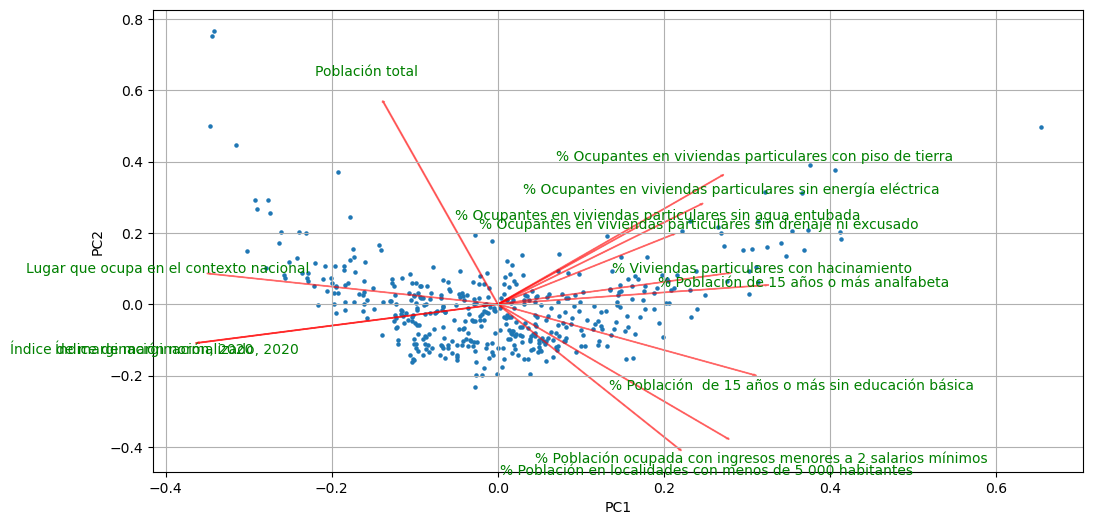

In [182]:
plt.figure(figsize=(12, 6))
biplot(pca2comp, np.transpose(embed_pca_2d.components_), list(X.columns))

**Creamos un mapa 2D para observar los cluster del nivel de Indigencia**

In [165]:
Plot2D(pca2comp, y, 'PCA de 2 dimensiones')

**Creamos un mapa 2D para observar los cluster de los estados**

In [77]:
Plot2D(pca2comp, y_estados, 'PCA de 2 dimensiones')

**Creamos un mapa 3D para observar los cluster del nivel de Indigencia**

In [80]:
Plot3D(pca3comp, y, 'PCA de 3 dimensiones')

**Creamos un mapa 3D para observar los cluster de los estados**

In [82]:
Plot3D(pca3comp, y_estados, 'PCA de 3 dimensiones')

### 5. SOM

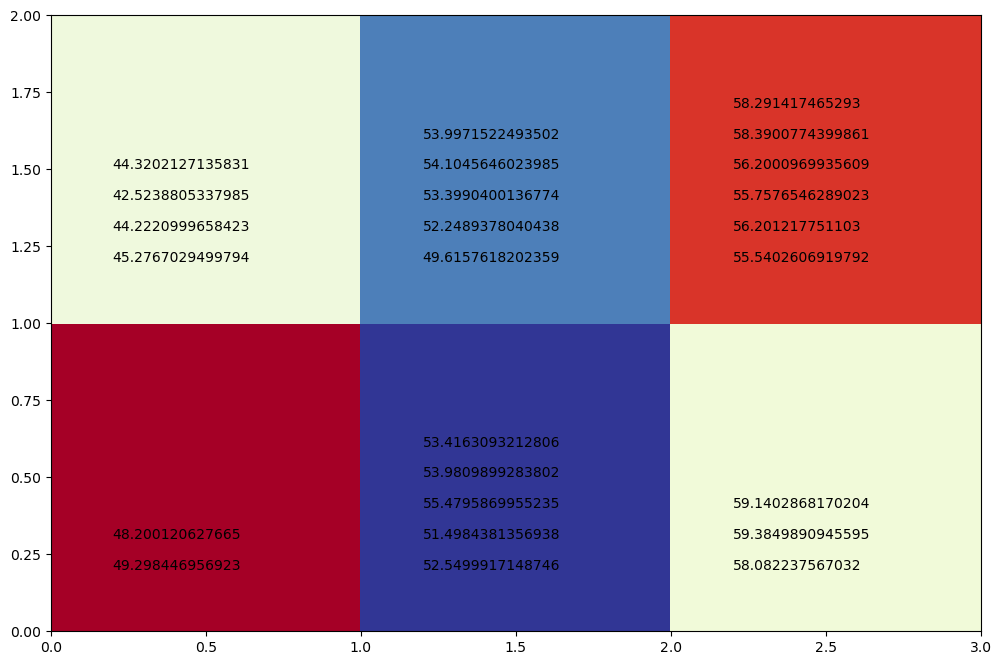

In [233]:
embed_som = MiniSom(x = 3, y = 2, 
                 input_len = X.shape[1], 
                 sigma = 1.0, 
                 learning_rate = 0.6)
embed_som.random_weights_init(np.array(X))
embed_som.train_random(np.array(X), num_iteration=200)

plt.figure(figsize=(12, 8))
plt.bone()
plt.pcolor(embed_som.distance_map().T, cmap = 'RdYlBu')

cont = dict()
for j in range(2):
    for i in range(5):
        cont[(i, j)] = 0

cat = list(y.astype("category").cat.categories)

for word in cat:
    c = 0
    for i, xx in enumerate(np.array(X)):
        if c <= 4 and np.array(y)[i] == word:
            c += 1
            w = embed_som.winner(xx)
            plt.text(w[0] + 0.2, w[1] + 0.2 + 0.1*cont[w], np.array(y_margin)[i])
            cont[w] += 1

plt.savefig('f4.pdf')
plt.show()



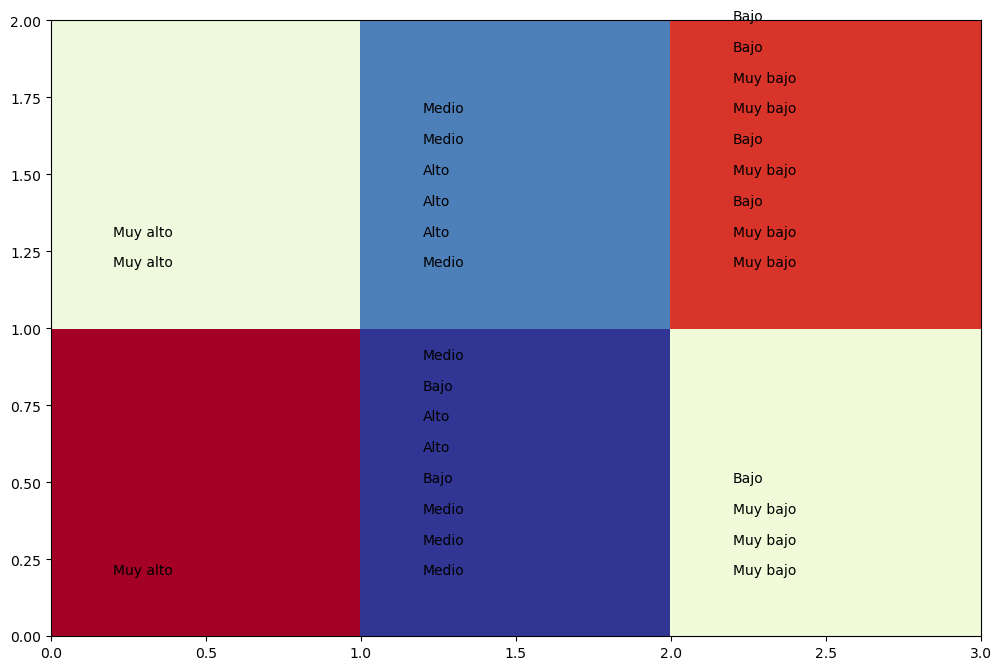

In [239]:
plt.figure(figsize=(12, 8))
plt.bone()
plt.pcolor(embed_som.distance_map().T, cmap = 'RdYlBu')

cont = dict()
for j in range(2):
    for i in range(5):
        cont[(i, j)] = 0

cat = list(y_estados.astype("category").cat.categories)

for word in cat:
    c = 0
    for i, xx in enumerate(np.array(X)):
        if c <= 5 and np.array(y_estados)[i] == word:
            c += 1
            w = embed_som.winner(xx)
            plt.text(w[0] + 0.2, w[1] + 0.2 + 0.1*cont[w], np.array(y)[i])
            cont[w] += 1

plt.savefig('f4.pdf')
plt.show()

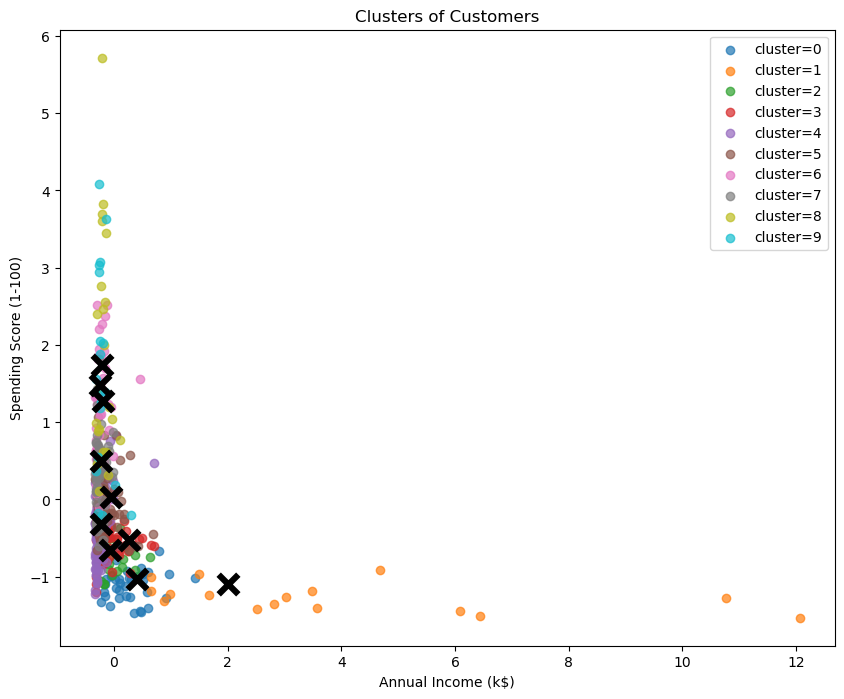

In [227]:
winner_coordinates = np.array([embed_som.winner(x) for x in np.array(X)]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (5, 2))

# Plotting the clusters 
plt.figure(figsize=(10,8))

for c in np.unique(cluster_index):
    plt.scatter(np.array(X)[cluster_index == c, 0],
                np.array(X)[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# Plotting centroids
for centroid in embed_som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k') # label='centroid'
    
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend();